In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
#from matplotlib import rcParams
#from scipy import stats

# Ingreso de datos

In [2]:
df = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/Data_Final.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)

# Dar formato de fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], format = "%Y-%m" )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790447 entries, 0 to 790446
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   NRO_SOLICITUD          790447 non-null  int64         
 1   OBLIGACION             790447 non-null  int64         
 2   PAGARE                 790447 non-null  object        
 3   NOM_TIPOCLIENTE        790447 non-null  object        
 4   REGION                 790447 non-null  object        
 5   MUNICIPIO_CLIENTE      790447 non-null  object        
 6   UBICACIO_CLIENTE       790447 non-null  object        
 7   MONTO                  790447 non-null  int64         
 8   FEC_SOLICITUD          790447 non-null  object        
 9   FEC_APROBA             790447 non-null  object        
 10  FEC_DESEMBOLSO         790447 non-null  object        
 11  VALOR_CUOTA            790447 non-null  float64       
 12  CUOTAS_PACTADAS        790447 non-null  floa

In [3]:
# Dataframe ultimo mes registrado
df_ultimo  =  df[df['FECHA'] == df['FECHA'].max()]

# Indicador 1: Total capital vencido en el ultimos mes registrado
cap_ven = df_ultimo['CAPITAL_VEN'].sum()

# Indicador 2: porcentaje de clientes que estan en mora en el ultimos mes registrado
por_mora = df_ultimo['DEUDOR'].sum()/df_ultimo['DEUDOR'].count()

# Indicador 3: Total por pagar en el ultimo mes registrado
total_saldo = df_ultimo['SALDO_OBLIGACION'].sum()


In [4]:
# Agrupar por fecha y variables de interes
df_tiempo = df.groupby(['FECHA','GENERO'], as_index=False).agg(CAPITAL_VENCIDO= ('CAPITAL_VEN','sum'),
                                     DEUDOR_SUMA = ('DEUDOR','sum'),
                                     DEUDOR_COUNT= ('DEUDOR','count'),
                                     SALDO_TOTAL= ('SALDO_OBLIGACION','sum'))

#Poner clientes en mora en porcentajes
df_tiempo['CLIENTES_MORA'] = df_tiempo['DEUDOR_SUMA']/df_tiempo['DEUDOR_COUNT']
df_tiempo.head()

,FECHA,GENERO,CAPITAL_VENCIDO,DEUDOR_SUMA,DEUDOR_COUNT,SALDO_TOTAL,CLIENTES_MORA
0,2017-01-01,Femenino,953838900,2679,8638,24897848474,0.310141
1,2017-01-01,Masculino,853802236,2118,6884,24539220198,0.307670
2,2017-02-01,Femenino,1014769190,2616,8583,24628526797,0.304789
3,2017-02-01,Masculino,947108157,2159,6878,24244493806,0.313899
4,2017-03-01,Femenino,914750690,2502,8639,24372801335,0.289617


<AxesSubplot:xlabel='FECHA', ylabel='CAPITAL_VENCIDO'>

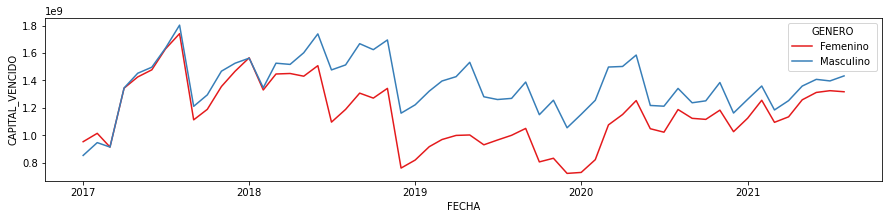

In [5]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='CAPITAL_VENCIDO',data=df_tiempo,palette='Set1', ci = None, legend='brief', hue='GENERO')

<AxesSubplot:xlabel='FECHA', ylabel='SALDO_TOTAL'>

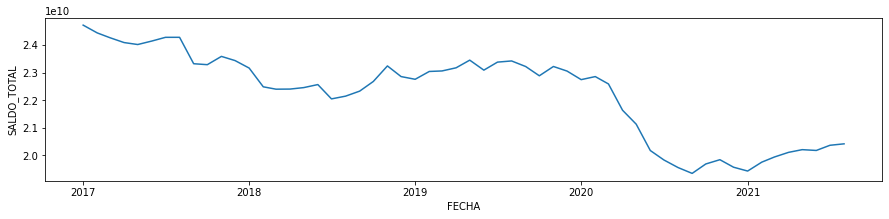

In [6]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='SALDO_TOTAL',data=df_tiempo,palette='Set1', ci = None, legend='brief')

<AxesSubplot:xlabel='FECHA', ylabel='CLIENTES_MORA'>

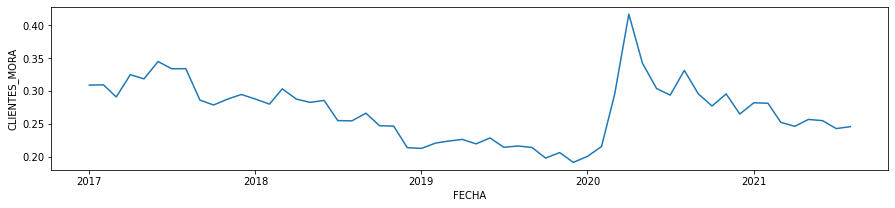

In [7]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='CLIENTES_MORA',data=df_tiempo,palette='Set1', ci = None, legend='brief')

In [8]:
df.columns

Index(['NRO_SOLICITUD', 'OBLIGACION', 'PAGARE', 'NOM_TIPOCLIENTE', 'REGION',
       'MUNICIPIO_CLIENTE', 'UBICACIO_CLIENTE', 'MONTO', 'FEC_SOLICITUD',
       'FEC_APROBA', 'FEC_DESEMBOLSO', 'VALOR_CUOTA', 'CUOTAS_PACTADAS',
       'CUOTAS_PENDIENTES', 'PERIODICIDAD', 'CALIFICACION_CIERRE', 'LINEA',
       'COD_MODALIDAD', 'SALDO_OBLIGACION', 'VENCIDA', 'DIAS_VENCIDO',
       'CAPITAL_VEN', 'INTERES_VEN', 'MORA', 'COMISION', 'FEC_ULT.PAGO',
       'FEC_PROXIMO_PAGO', 'VENCIMIENTO_FINAL', 'PORCENTAJE_PAGO',
       'TIPO_CREDITO', 'FECHA', 'TASA_NOM_ANUAL', 'TASA_PERIODICA', 'ID', 'PP',
       'CP', 'GENERO', 'EDAD', 'NIVEL_DE_ESTUDIOS', 'MORA_STATUS', 'SUCURSAL',
       'ESTRATO', 'DESTINACION', 'TIPO_VIVIENDA', 'CODEUDOR_REF', 'DEUDOR',
       'ACUMULADO', 'NIVEL_DE_ESTUDIOS_NEW'],
      dtype='object')

## transformando los csv en gzip

### primero data_final.csv

In [16]:
result_save = df.to_csv('Data_Final' + '.gzip', \
                                           index=True, \
                                           compression='gzip')

In [17]:
reload = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Data_Final.gzip',
 sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip')

In [18]:
print(reload.shape)
print(df.shape)

(790447, 48)
(790447, 48)


In [19]:
reload.head()

,NRO_SOLICITUD,OBLIGACION,PAGARE,NOM_TIPOCLIENTE,REGION,MUNICIPIO_CLIENTE,UBICACIO_CLIENTE,MONTO,FEC_SOLICITUD,FEC_APROBA,...,NIVEL_DE_ESTUDIOS,MORA_STATUS,SUCURSAL,ESTRATO,DESTINACION,TIPO_VIVIENDA,CODEUDOR_REF,DEUDOR,ACUMULADO,NIVEL_DE_ESTUDIOS_NEW
0,29179,29179,37327,Microfinanciero,REGION CENTRO,YOPAL,URBANA,24000000,2012-11-29,2012-11-30,...,Universitaria,0.0,NaN,NaN,NaN,NaN,NaN,1,0,Superior
1,29179,29179,37327,Microfinanciero,REGION CENTRO,YOPAL,URBANA,24000000,2012-11-29,2012-11-30,...,Universitaria,0.0,NaN,NaN,NaN,NaN,NaN,1,0,Superior
2,29179,29179,37327,Microfinanciero,REGION CENTRO,YOPAL,URBANA,24000000,2012-11-29,2012-11-30,...,Universitaria,0.0,NaN,NaN,NaN,NaN,NaN,1,0,Superior
3,29179,29179,37327,Microfinanciero,REGION CENTRO,YOPAL,URBANA,24000000,2012-11-29,2012-11-30,...,Universitaria,0.0,NaN,NaN,NaN,NaN,NaN,1,0,Superior
4,29179,29179,37327,Microfinanciero,REGION CENTRO,YOPAL,URBANA,24000000,2012-11-29,2012-11-30,...,Universitaria,0.0,NaN,NaN,NaN,NaN,NaN,1,0,Superior


### transformando data_modelo.csv

In [20]:
df_modelo = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/Data_modelo.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)

In [22]:
result_save1 = df_modelo.to_csv('Data_modelo' + '.gzip', \
                                           index=True, \
                                           compression='gzip')

In [23]:
reload2 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Data_modelo.gzip',
 sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip')

In [25]:
print(reload2.shape)
print(df_modelo.shape)

(605985, 49)
(605985, 49)


In [26]:
reload2.head()

,NRO_SOLICITUD,OBLIGACION,PAGARE,NOM_TIPOCLIENTE,REGION,MUNICIPIO_CLIENTE,UBICACIO_CLIENTE,MONTO,FEC_SOLICITUD,FEC_APROBA,...,MORA_STATUS,SUCURSAL,ESTRATO,DESTINACION,TIPO_VIVIENDA,CODEUDOR_REF,DEUDOR,ACUMULADO,NIVEL_DE_ESTUDIOS_NEW,AÑO_APROBACION
182952,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,0,0,Media,2017
182953,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,0,0,Media,2017
182954,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,0,0,Media,2017
182955,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,1,0,Media,2017
182956,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,1,0,Media,2017


### Transformando municipios y departamentos

In [27]:
df_md = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/municipios_y_departamentos.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)

In [29]:
result_save3 = df_md.to_csv('Municipios_departamentos' + '.gzip', \
                                           index=True, \
                                           compression='gzip')

In [30]:
reload3 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Municipios_departamentos.gzip',
 sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip')

In [31]:
print(reload3.shape)
print(df_md.shape)

(275, 4)
(275, 4)


### Transformando prueba_reglog

In [9]:
df_reglog = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/prueba_reglog.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)

In [10]:
result_save4 = df_reglog.to_csv('Prueba_reglog' + '.gzip', \
                                           index=True, \
                                           compression='gzip')

In [12]:
reload4 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/Prueba_reglog.gzip',
 sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip')

In [13]:
print(reload4.shape)
print(df_reglog.shape)

(605780, 31)
(605780, 31)
